# Ethno

This notebook is a global template for loading and preprocess data.

## What is the SVM algorithm?

 It is a supervised learning algorithm designed to solve discrimination and regression problems.
 
 It is a very good image classification algorithm.
 
 ![enter image description here](https://editor.analyticsvidhya.com/uploads/61706svm3.png)
 
 ## Summary
 
 1. [Data preparation](#prepaData)
 2. [Learning of model](#model)
 3. [Displaying metrcis](#metric)
 4. [Conclusion](#conclusion)

### 1. Data preparation <a id="prepaData"></a>
 
 - To start, we import the necessary libraries.

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import cv2
import time
import tensorflow as tf
from tqdm import tqdm
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, Input, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
from tqdm import tqdm


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

 - We define all necessary variables.

In [16]:
import pathlib
path = ''
train_path = ''
test_path = ''
val_path = ''
IMG_SIZE = 100
scale = 1
batch_size = 10
nb_train_samples = 100
nb_validation_samples = 100
epochs = 10



- We do a data augmentation of our pictures and load all of our data

In [17]:
def loadingData(path):
    CATEGORIES = []
    data = []

    dirs = os.listdir(path)
    for file in dirs:
        CATEGORIES.append(file)

    for category in tqdm(CATEGORIES):
        localPath = os.path.join(path, category)
        for img in os.listdir(localPath):
            img_array = cv2.imread(os.path.join(localPath, img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append([new_array, category])

    return data

In [18]:
data = loadingData(path)


100%|██████████| 2/2 [00:00<00:00,  3.54it/s]


In [20]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# rescaling
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    val_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=batch_size,
    class_mode='binary')


Found 60 images belonging to 2 classes.
Found 58 images belonging to 2 classes.


### 2. Learning of model <a id="model"></a>

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
          input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(120))
# model.add(layers.Dropout(0.4))
model.add(layers.Dense(2, activation='softmax'))


Afin de ne pas tâtonner sur le nombre d’epochs à réaliser, je vais utiliser la technique de l’earlyStopping qui permet d’arrêter l’apprentissage dés lors que le modèle commence à faire du sur-apprentissage. Celà me permet de négliger ce parametre (epochs).


In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

NameError: name 'EarlyStopping' is not defined

### Init training's Callback

In [25]:
def callbacks():
    callbacks = [
        tf.keras.callbacks.ModelCheckpoint(
            filepath='lstmchar256256128test.h5',
            monitor='loss',
            save_best_only=True
        ),
        tf.keras.callbacks.EarlyStopping(
            monitor='loss',
            min_delta=0,
            patience=4,
            mode='auto',
            baseline=None,
        )
    ]
    return callbacks


In [26]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)      

In [ ]:
y_test = np.array(test_path)
y_train = np.array(train_path)


Epoch 1/10


ValueError: in user code:

    File "/Users/guixax/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/Users/guixax/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/guixax/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/Users/guixax/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "/Users/guixax/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/guixax/opt/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_11" is incompatible with the layer: expected shape=(None, 100, 100, 1), found shape=(None, 30000)


### loss + accuracy graph

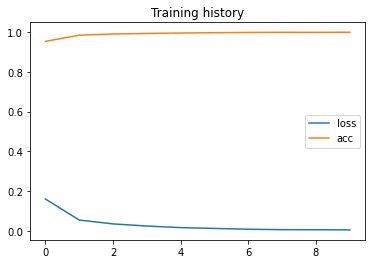

In [ ]:
import matplotlib.pyplot as plt

history_loss = history.history["loss"]
history_acc = history.history["accuracy"]

plt.plot(history_loss, label="loss")
plt.plot(history_acc, label="acc")
plt.title("Training history")
plt.legend()


### Prediction

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

predicted_classes = np.argmax(pred, axis=1)
report = classification_report(predicted_classes, y_test, target_names=labels)
print(report)


ValueError: Number of classes, 10, does not match size of target_names, 2. Try specifying the labels parameter

### Cunsion Mactix

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
cm = confusion_matrix(y_true=history, y_pred=predicted_classes)


NameError: name 'predicted_classes' is not defined